<a href="https://colab.research.google.com/github/KUSHAL67F4/OIBSIP/blob/main/Oasis_Infobyte_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
print("number of rows:",df.shape[0])

number of rows: 5572


In [11]:
print("Number of columns:",df.shape[1])

Number of columns: 5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
X = df['v2']
y = df['v1']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)


X_test_vec = vectorizer.transform(X_test)

# Performing feature selection using SelectKBest with chi-square score
feature_selector = SelectKBest(chi2, k=1000)
X_train_selected = feature_selector.fit_transform(X_train_vec, y_train)
X_test_selected = feature_selector.transform(X_test_vec)


model = SVC()

# Trainng the model
model.fit(X_train_selected, y_train)


# Make predictions
y_pred = model.predict(X_test_selected)

# Calculateing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9695067264573991


In [24]:
classification_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       965
        spam       0.88      0.89      0.89       150

    accuracy                           0.97      1115
   macro avg       0.93      0.94      0.93      1115
weighted avg       0.97      0.97      0.97      1115



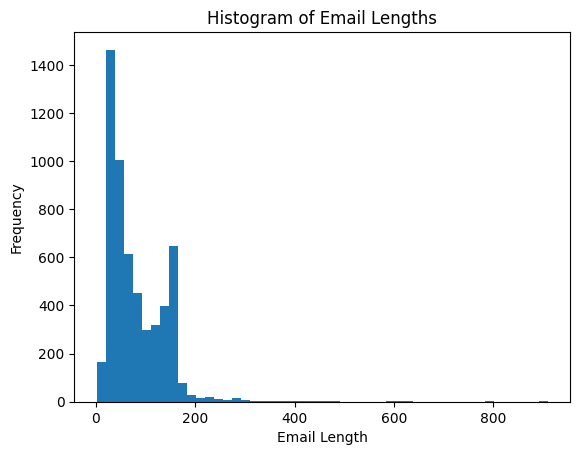

In [38]:
import matplotlib.pyplot as plt

# Compute the lengths of emails
email_lengths = df['v2'].apply(len)

# Create a histogram of email lengths
plt.hist(email_lengths, bins=50)
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Histogram of Email Lengths')
plt.show()

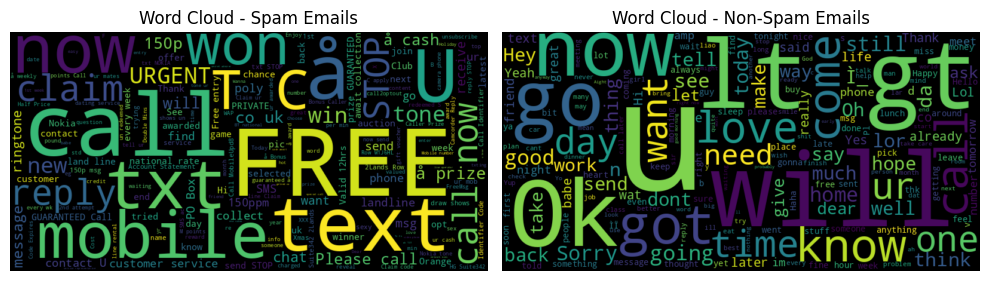

In [32]:
from wordcloud import WordCloud

spam_emails = df[df['v1'] == 'spam']['v2']
non_spam_emails = df[df['v1'] == 'ham']['v2']

spam_wordcloud = WordCloud(width=800, height=400).generate(' '.join(spam_emails))
non_spam_wordcloud = WordCloud(width=800, height=400).generate(' '.join(non_spam_emails))

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Non-Spam Emails')
plt.axis('off')

plt.tight_layout()
plt.show()

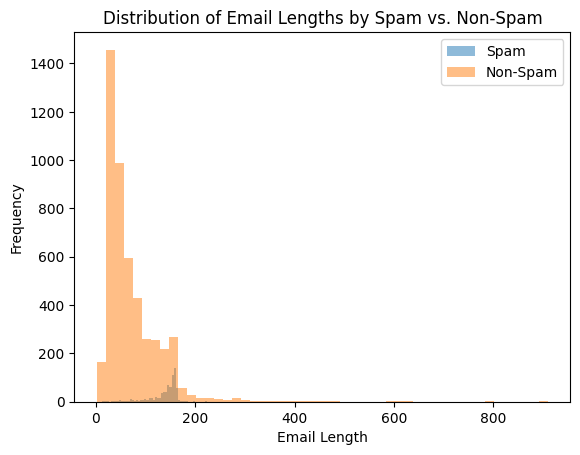

In [33]:
spam_lengths = df[df['v1'] == 'spam']['v2'].apply(len)
non_spam_lengths = df[df['v1'] == 'ham']['v2'].apply(len)

# Create a histogram of email lengths
plt.hist(spam_lengths, bins=50, alpha=0.5, label='Spam')
plt.hist(non_spam_lengths, bins=50, alpha=0.5, label='Non-Spam')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths by Spam vs. Non-Spam')
plt.legend()
plt.show()

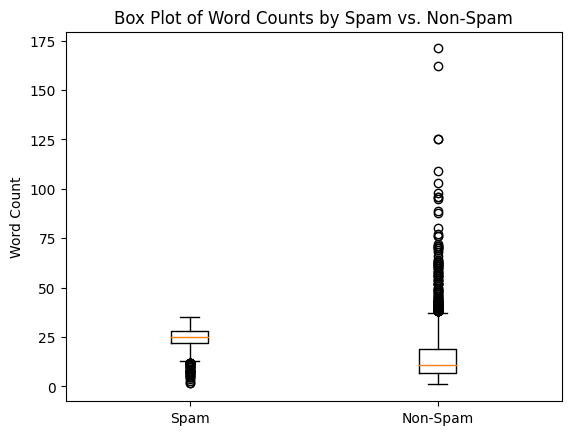

In [34]:
spam_word_counts = df[df['v1'] == 'spam']['v2'].str.split().apply(len)
non_spam_word_counts = df[df['v1'] == 'ham']['v2'].str.split().apply(len)

# Create a box plot of word counts
plt.boxplot([spam_word_counts, non_spam_word_counts], labels=['Spam', 'Non-Spam'])
plt.ylabel('Word Count')
plt.title('Box Plot of Word Counts by Spam vs. Non-Spam')
plt.show()

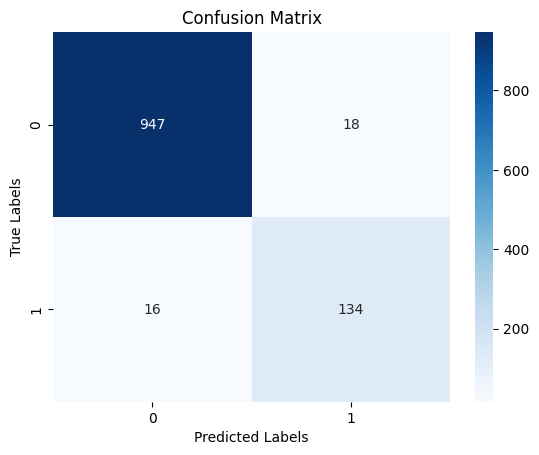

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

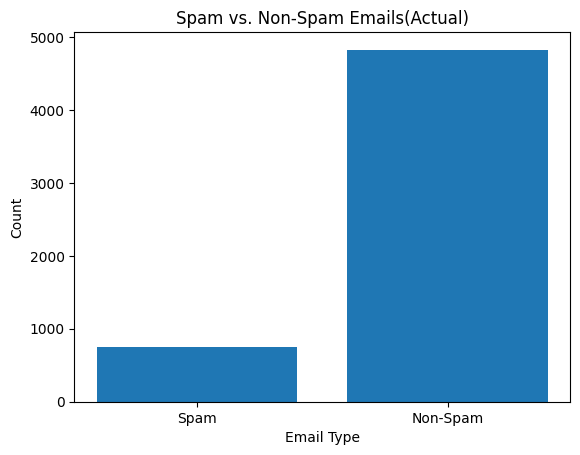

In [41]:
# Count the number of spam and non-spam emails
spam_count = df[df['v1'] == 'spam'].shape[0]
non_spam_count = df[df['v1'] == 'ham'].shape[0]

# Create a bar plot
labels = ['Spam', 'Non-Spam']
counts = [spam_count, non_spam_count]

plt.bar(labels, counts)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Spam vs. Non-Spam Emails (Actual)')
plt.show()

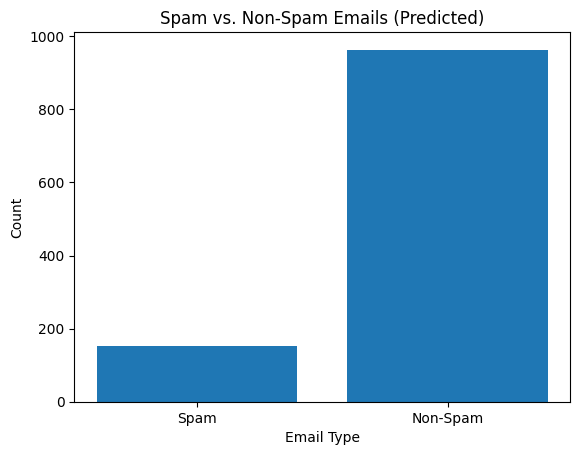

In [37]:
spam_count = sum(y_pred == 'spam')
non_spam_count = sum(y_pred == 'ham')

# Create a bar plot
labels = ['Spam', 'Non-Spam']
counts = [spam_count, non_spam_count]

plt.bar(labels, counts)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Spam vs. Non-Spam Emails (Predicted)')
plt.show()